# Loan Approval Prediction

In [34]:
########## Importing important libraries ##########
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
########## Importing the data ##########
loan = pd.read_csv("train.csv")
print("Data Set Successfully Imported")

Data Set Successfully Imported


# Exploratory Data Analysis-(EDA)

steps involved to understand, clean and prepare our data for building model <br />
1. variable identification <br />
2. univariate analysis <br />
3. bi-variate analysis <br />
4. missing values treatment <br />
5. outliers treatment <br />
6. variable transformation <br />
7. variable creation <br />
Finally we iterate steps 4-7 till we get good model.

## Variable Identification

In [36]:
########## look the data ##########
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


The machine learning model is trained using the training data set. Every new applicant details filled at the time of application form acts as a test data set. On the basis of the training data sets, the model will
predict whether a loan would be approved or not.

In [37]:
####### check no. of rows and columns #######
loan.shape

(614, 13)

**Inference:** <br />
      There are 614 records and 13 features.

In [38]:
loan.info()  #There are some missing values in  data,we will handle as go along.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have 13 features in total out of which we have 12 independent variables and 1 dependent variable i.e. Loan_Status in train dataset The Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status are all categorical

In [39]:
#Count distinct observations without NaN values.
loan.nunique().sort_values(ascending=False)

Loan_ID              614
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
dtype: int64

**Inference:** <br />
Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables.

In [40]:
# change the data type of Credit_History column
loan['Credit_History'] = loan['Credit_History'].astype('O')

In [41]:
#Let's look at the number of columns of each data type. int64 and float64 are numeric variables
# (which can be either discrete or continuous). object columns contain strings and are categorical features.
loan.dtypes.value_counts()

object     9
float64    3
int64      1
dtype: int64

In [42]:
# unique classes in each object columns
object_var=loan.select_dtypes('object').columns
object_var=object_var[1:]
unique_values=[]
for i in range(0,8):
    unique_values.append(loan[object_var[i]].unique())
object_var_table=pd.DataFrame({"Object_variable":object_var,"Unique_Values":unique_values})
object_var_table

,Object_variable,Unique_Values
0,Gender,"[Male, Female, nan]"
1,Married,"[No, Yes, nan]"
2,Dependents,"[0, 1, 2, 3+, nan]"
3,Education,"[Graduate, Not Graduate]"
4,Self_Employed,"[No, Yes, nan]"
5,Credit_History,"[1.0, 0.0, nan]"
6,Property_Area,"[Urban, Rural, Semiurban]"
7,Loan_Status,"[Y, N]"


In [43]:
#describe the numeric columns
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [44]:
# describe the chategoric columns
loan.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [45]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data Visualisation

## Univariate Analysis

#### Categorical Variables:

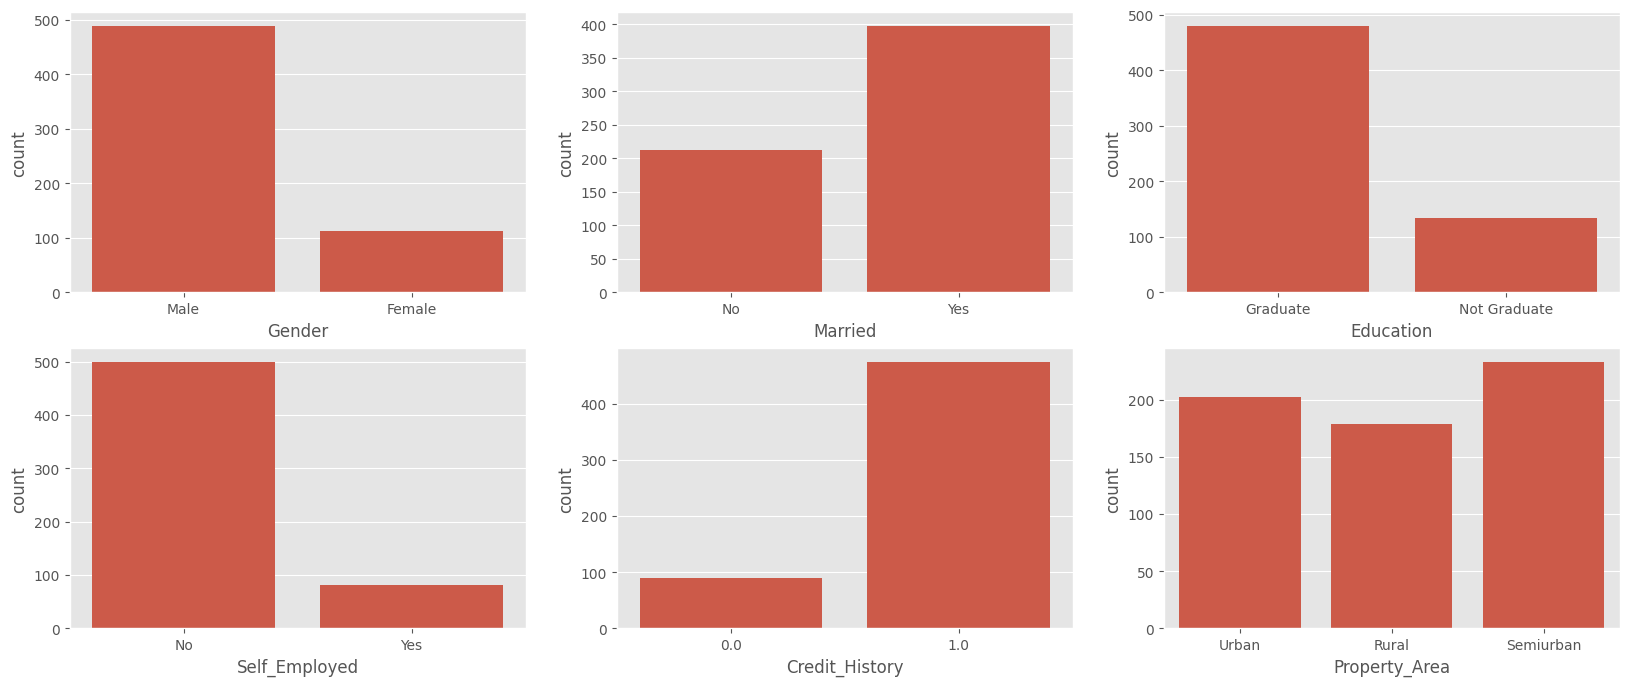

In [46]:
plt.figure(figsize=(20, 8))
plt.subplot(231)
sns.countplot(x='Gender', data=loan)

plt.subplot(232)
sns.countplot(x='Married', data=loan)

plt.subplot(233)
sns.countplot(x='Education', data=loan)

plt.subplot(234)
sns.countplot(x='Self_Employed', data=loan)

plt.subplot(235)
sns.countplot(x='Credit_History', data=loan)

plt.subplot(236)
sns.countplot(x='Property_Area', data=loan)

plt.show()


**Inference:** <br />
Mostly, those who **Male**, **Married**, **Graduated**, **Not Self_Employed** they applied for Loan.<br />
Those who a high **Credit_History** (1.0) they mostly applied for Loan.<br />
From any **Property_Area** people applied for Loan.

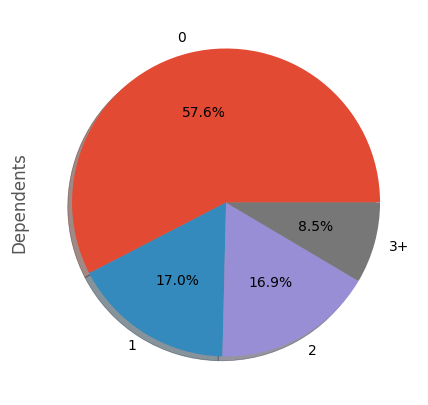

In [47]:
plt.figure(figsize=(10,5))
loan['Dependents'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True);plt.show()

**Inference:** <br />
Mostly those who have **NO dependents** they applied for Loan

Y    422
N    192
Name: Loan_Status, dtype: int64


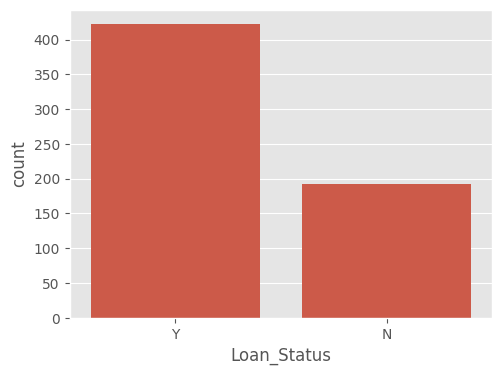

In [48]:
# Target Variable
plt.figure(figsize=(12, 4))
plt.subplot(122)
sns.countplot(x='Loan_Status', data=loan)#check our data is balanced or not

# Print the value counts
print(loan['Loan_Status'].value_counts())

plt.show()


**Inference:** <br />
From above, data is imbalanced we need to balance it.

### Continuous Variables:

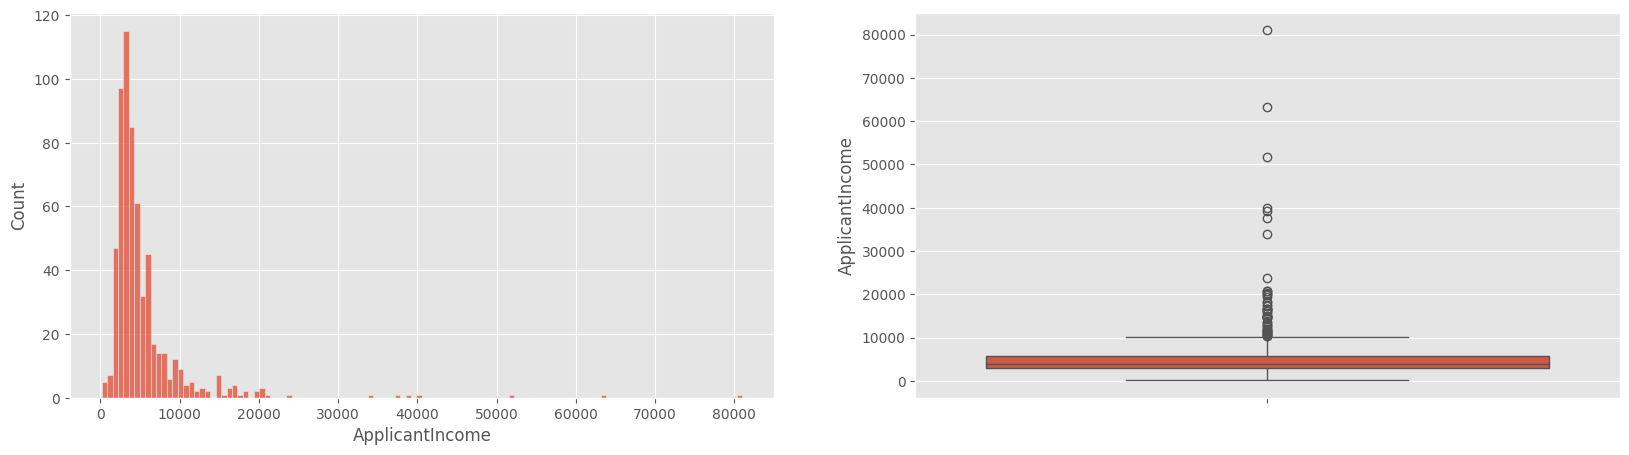

In [49]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['ApplicantIncome']);plt.subplot(122);sns.boxplot(loan['ApplicantIncome'])
plt.show()

**Inference:** <br />
Our data is *Not Normal* (Right Skewed) and Huge *Outliers* in ApplicantIncome.

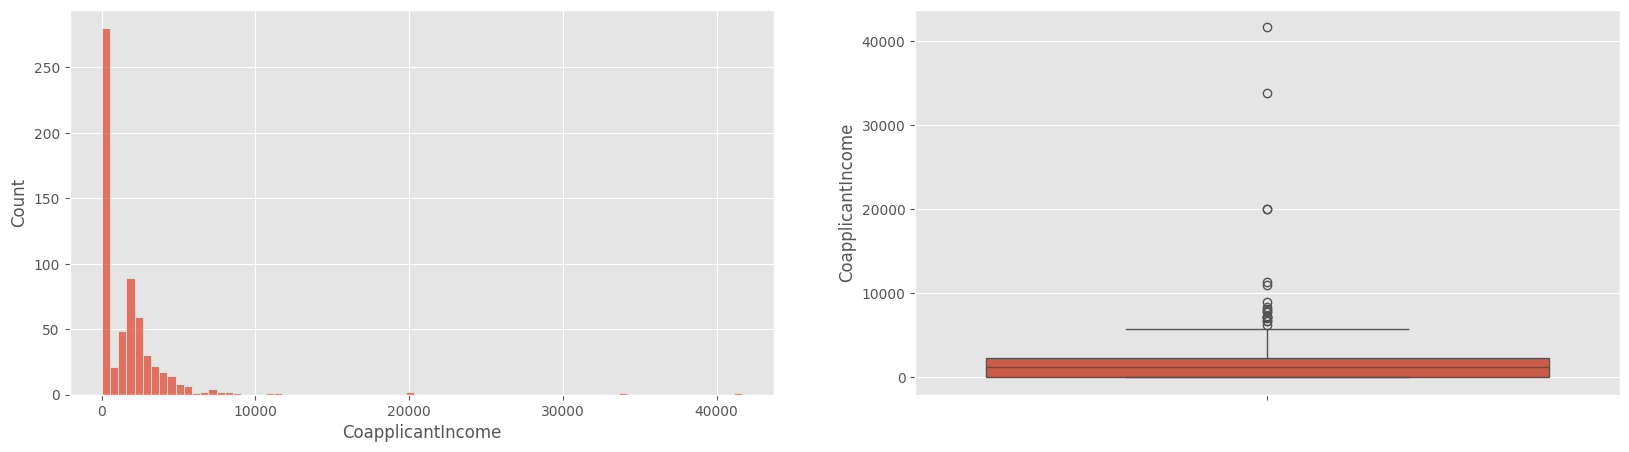

In [50]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['CoapplicantIncome']);plt.subplot(122);sns.boxplot(loan['CoapplicantIncome'])
plt.show()

**Inference:** <br />
Our data is *Not Normal* (Right Skewed) and There are *Outliers* in CoapplicantIncome.

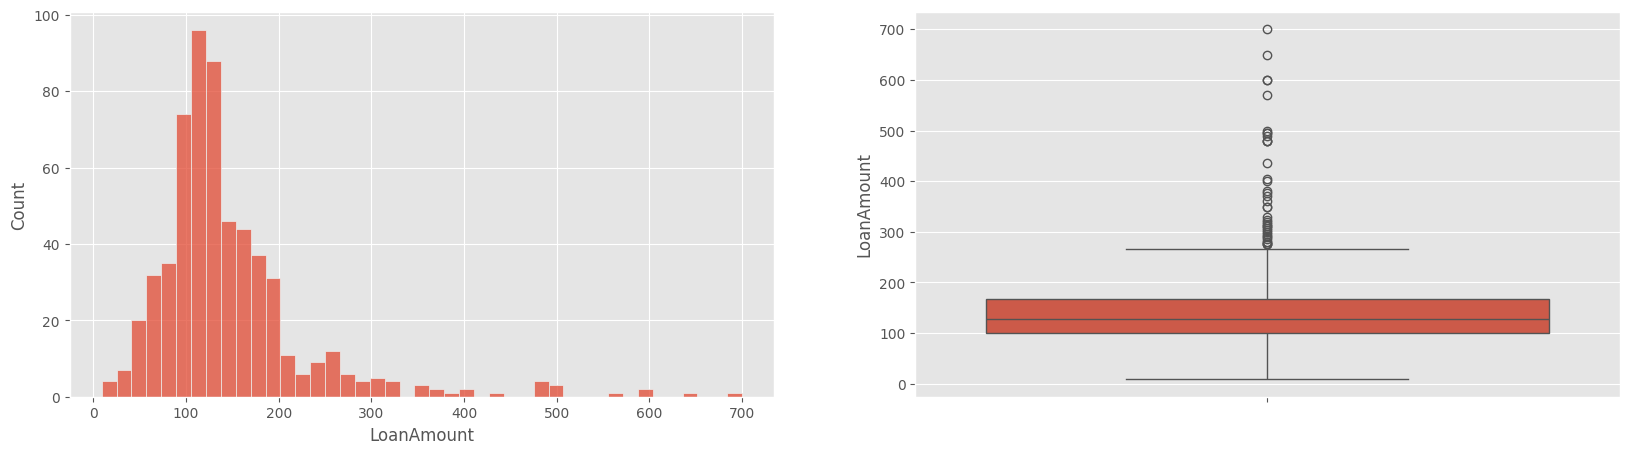

In [51]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['LoanAmount']);plt.subplot(122);sns.boxplot(loan['LoanAmount'])
plt.show()

**Inference:** <br />
Our data is *Not Normal* (Right Skewed) and Huge *Outliers* in LoanAmount.

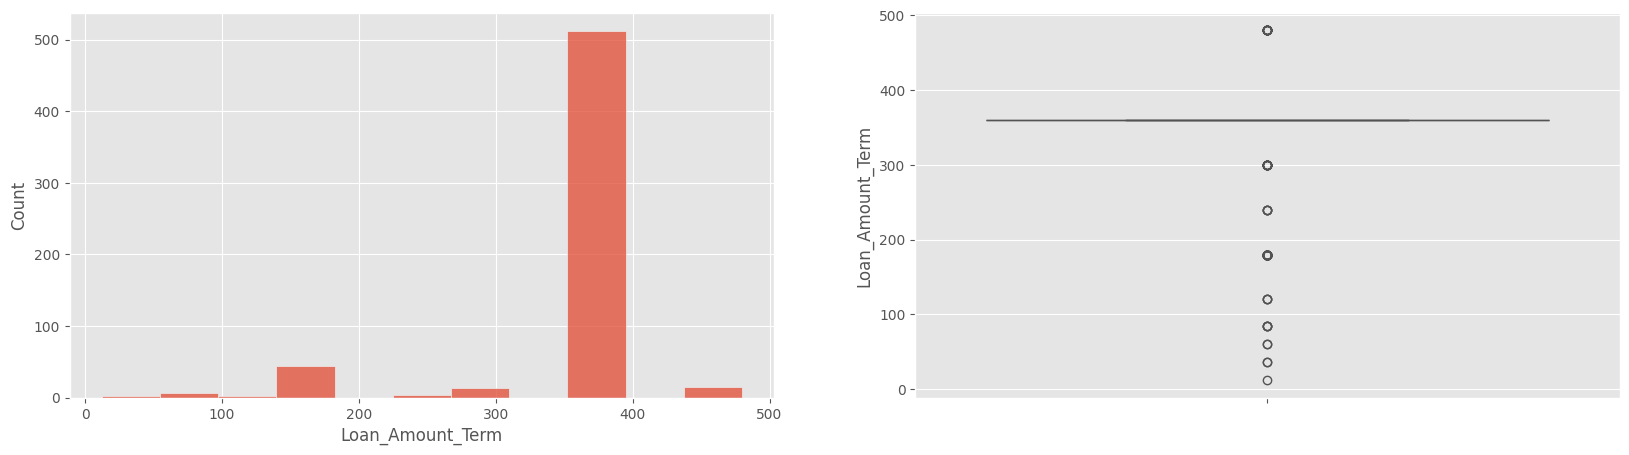

In [52]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['Loan_Amount_Term']);plt.subplot(122);sns.boxplot(loan['Loan_Amount_Term'])
plt.show()

**Inference:** <br />
Most **Loan_Amount_Term** is 360 months (30 years)

## Bi-variate Analysis

In [53]:
loan.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [54]:
# First we split numeric and chategoric columns seperately
cat_data = []
num_data = []
for col,types in enumerate(loan.dtypes):
    if types=='object':
        cat_data.append(loan.iloc[:,col])
    else:
        num_data.append(loan.iloc[:,col])

cat_data = pd.DataFrame(cat_data).T
num_data = pd.DataFrame(num_data).T

In [55]:
cat_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N


In [56]:
num_data.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0


### Continuous & Continuous :

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


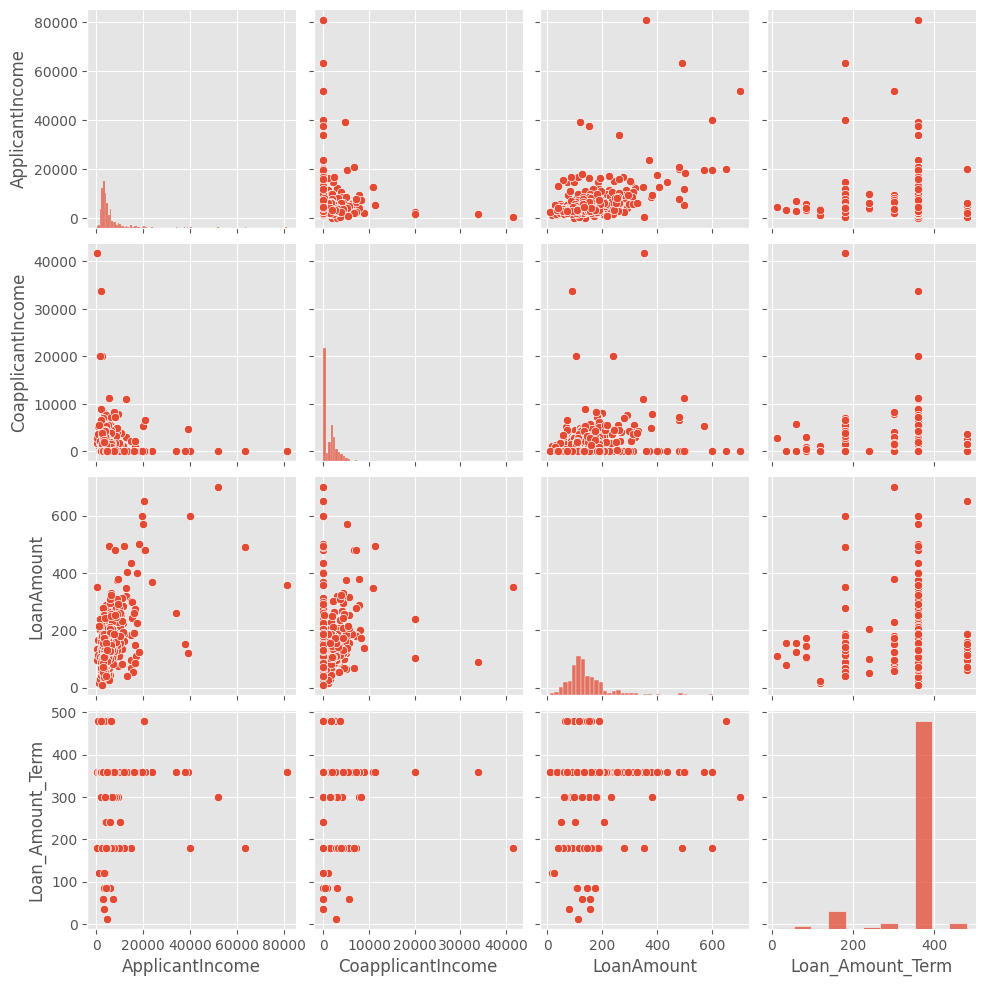

In [57]:
# Check available styles
print(plt.style.available)

# Use a different style
plt.style.use('ggplot')  # You can choose any style from the available list

# Assuming num_data is your DataFrame for the pairplot
sns.pairplot(num_data)
plt.show()


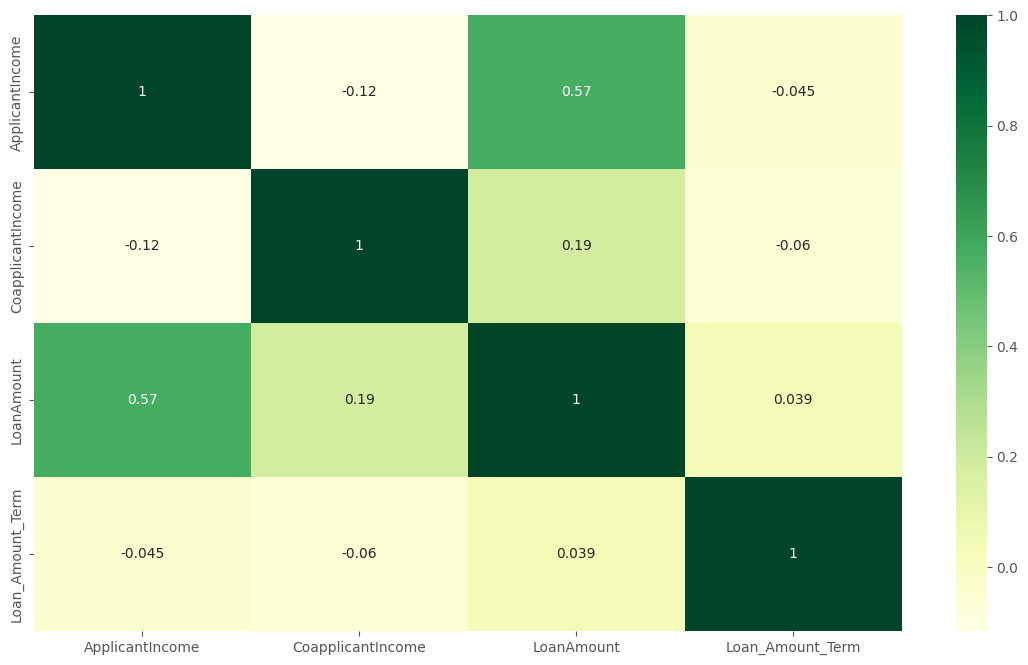

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming loan is your DataFrame containing the loan prediction dataset
numeric_columns = loan.select_dtypes(include=['number'])
plt.figure(figsize=(14, 8))
sns.heatmap(num_data.corr(), annot=True, cmap="YlGn")
plt.show()

**Inference:** <br />
We see that the most correlated variables are (ApplicantIncome - LoanAmount) and LoanAmount is also correlated with CoapplicantIncome

### Categorical & Categorical :

#### Two-way table

In [59]:
Education_tab=pd.crosstab(loan.Education,loan.Gender)
Education_tab  # we can see how many males and females are graduated or not.

Gender,Female,Male
Education,,
Graduate,92,376
Not Graduate,20,113


In [60]:
dependence_tab=pd.crosstab(loan.Dependents,loan.Self_Employed)
dependence_tab   # we can see those who NOT Self_Employed and NOT dependent mostly they apply for loan

Self_Employed,No,Yes
Dependents,,
0,289,37
1,76,20
2,80,16
3+,42,7


####  Pie Chart : (with target variable)

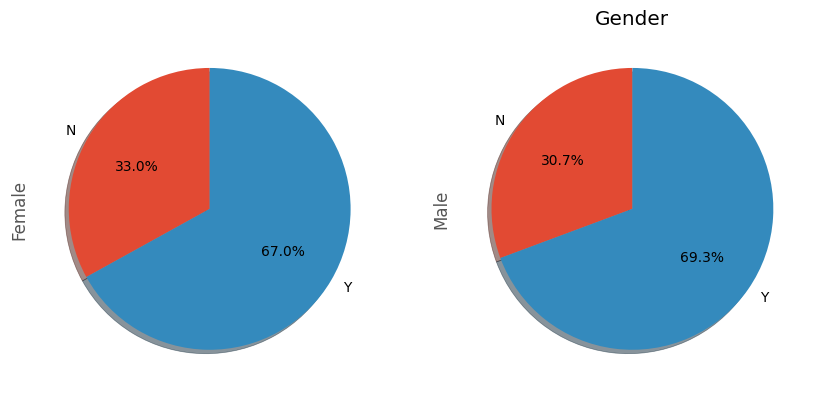

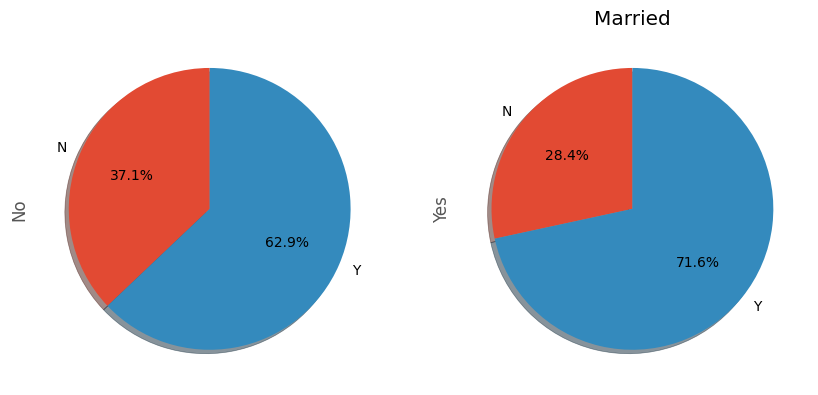

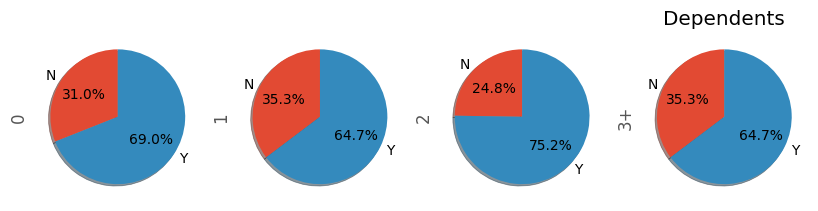

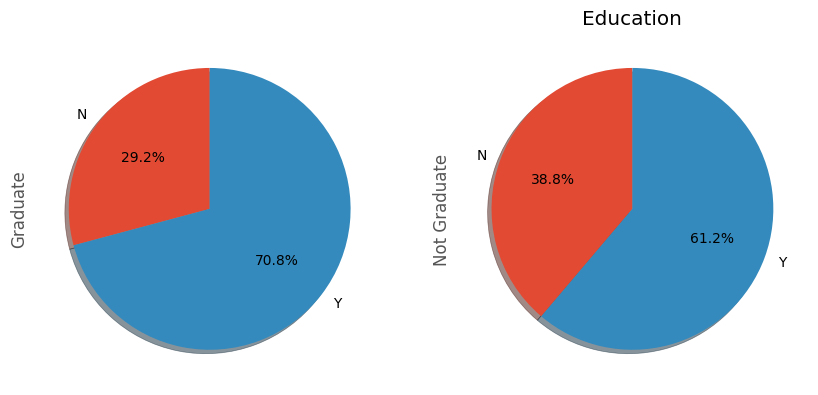

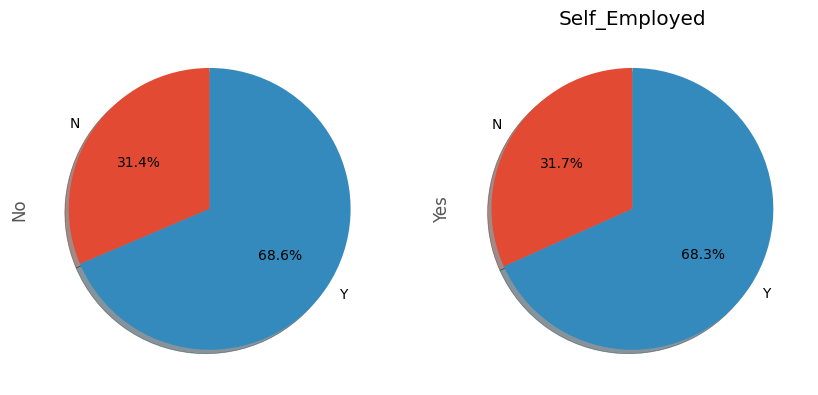

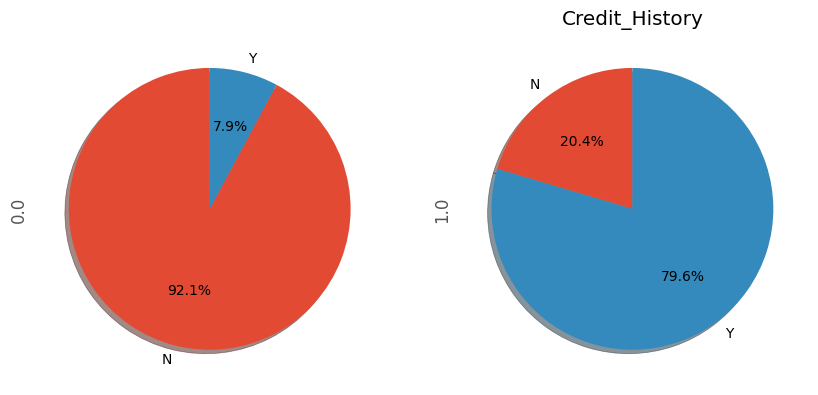

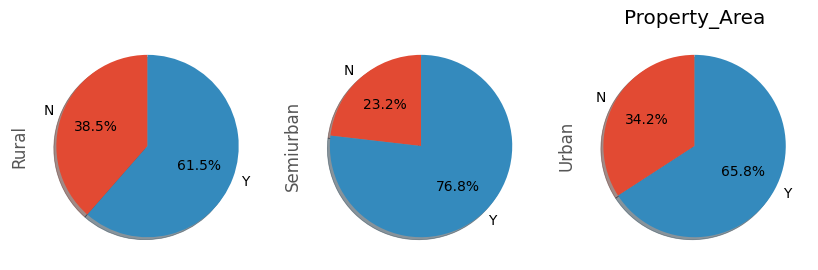

In [61]:
for i in object_var:
    if i!="Loan_Status":
        loan.groupby(["Loan_Status",i]).size().unstack(fill_value=0).plot.pie(subplots=True,figsize=(10, 8),startangle=90,shadow=True,autopct='%1.1f%%',legend=False)
        plt.title(i)

**Inference:** <br />
The People who have  good Credit History they got loan  most of the Time and other variables plays less importance role.

#### Chi-Square Test:

In [62]:
from scipy.stats import chi2_contingency
First_var=[]
Sec_var=[]
p_value=[]
Interpretation=[]
chi_square=[]
for i in cat_data.columns:
    crossT=pd.crosstab(cat_data[i],cat_data['Loan_Status'])
    p=chi2_contingency(crossT)[1]
    c=chi2_contingency(crossT)[0]
    First_var.append(i)
    Sec_var.append("Loan_Status")
    p_value.append(p)
    chi_square.append(c)
    if p<=0.05:
        Interpretation.append("The two categorical variables are dependent")
    else:
        Interpretation.append("The two categorical variables are independent")
description=pd.DataFrame({"Features":cat_data.columns,"Target variable":Sec_var,"chi2_score":chi_square,"p_value":p_value,"Interpretation":Interpretation})
description

,Features,Target variable,chi2_score,p_value,Interpretation
0,Loan_ID,Loan_Status,614.000000,4.810243e-01,The two categorical variables are independent
1,Gender,Loan_Status,0.139626,7.086530e-01,The two categorical variables are independent
2,Married,Loan_Status,4.475019,3.439381e-02,The two categorical variables are dependent
3,Dependents,Loan_Status,3.158340,3.678507e-01,The two categorical variables are independent
4,Education,Loan_Status,4.091490,4.309962e-02,The two categorical variables are dependent
5,Self_Employed,Loan_Status,0.000000,1.000000e+00,The two categorical variables are independent
6,Credit_History,Loan_Status,174.637297,7.184760e-40,The two categorical variables are dependent
7,Property_Area,Loan_Status,12.297623,2.136019e-03,The two categorical variables are dependent
8,Loan_Status,Loan_Status,609.355922,1.544676e-134,The two categorical variables are dependent


**Inference:** <br />
from above Credit_History, Property_Area, Married, Education, are dependent on Loan_Status

### Categorical & Continuous :

In [63]:
# find the predictive power score
import ppscore as pps
pps.predictors(loan,"Loan_Status") #We can calculate the PPS of all the predictors in the dataframe against a target y

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Credit_History,Loan_Status,0.492600,classification,True,weighted F1,0.592199,0.793081,DecisionTreeClassifier()
1,LoanAmount,Loan_Status,0.055993,classification,True,weighted F1,0.570946,0.594970,DecisionTreeClassifier()
2,Loan_Amount_Term,Loan_Status,0.039016,classification,True,weighted F1,0.573333,0.589980,DecisionTreeClassifier()
3,CoapplicantIncome,Loan_Status,0.036726,classification,True,weighted F1,0.563518,0.579548,DecisionTreeClassifier()
4,ApplicantIncome,Loan_Status,0.004756,classification,True,weighted F1,0.563518,0.565594,DecisionTreeClassifier()
5,Loan_ID,Loan_Status,0.000000,feature_is_id,True,None,0.000000,0.000000,None
6,Gender,Loan_Status,0.000000,classification,True,weighted F1,0.577371,0.561944,DecisionTreeClassifier()
7,Married,Loan_Status,0.000000,classification,True,weighted F1,0.557930,0.557927,DecisionTreeClassifier()
8,Dependents,Loan_Status,0.000000,classification,True,weighted F1,0.569282,0.562767,DecisionTreeClassifier()
9,Education,Loan_Status,0.000000,classification,True,weighted F1,0.563518,0.559917,DecisionTreeClassifier()


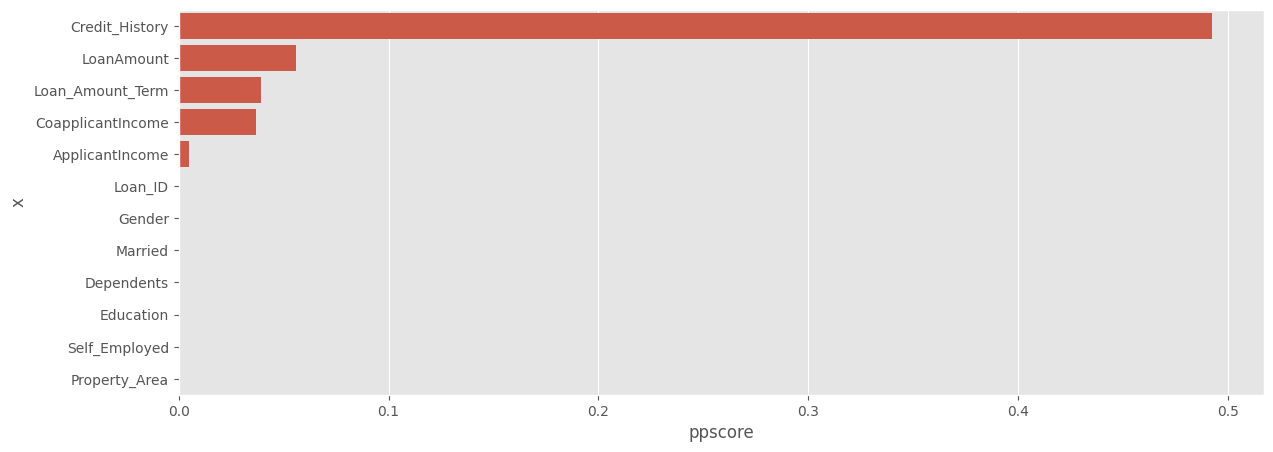

In [65]:
#Visualization of the results
plt.figure(figsize=(14,5))
predictors_df = pps.predictors(loan, y="Loan_Status")
sns.barplot(data=predictors_df, x="ppscore", y="x");plt.show()

# Multivariate Analysis

## Pair Plot

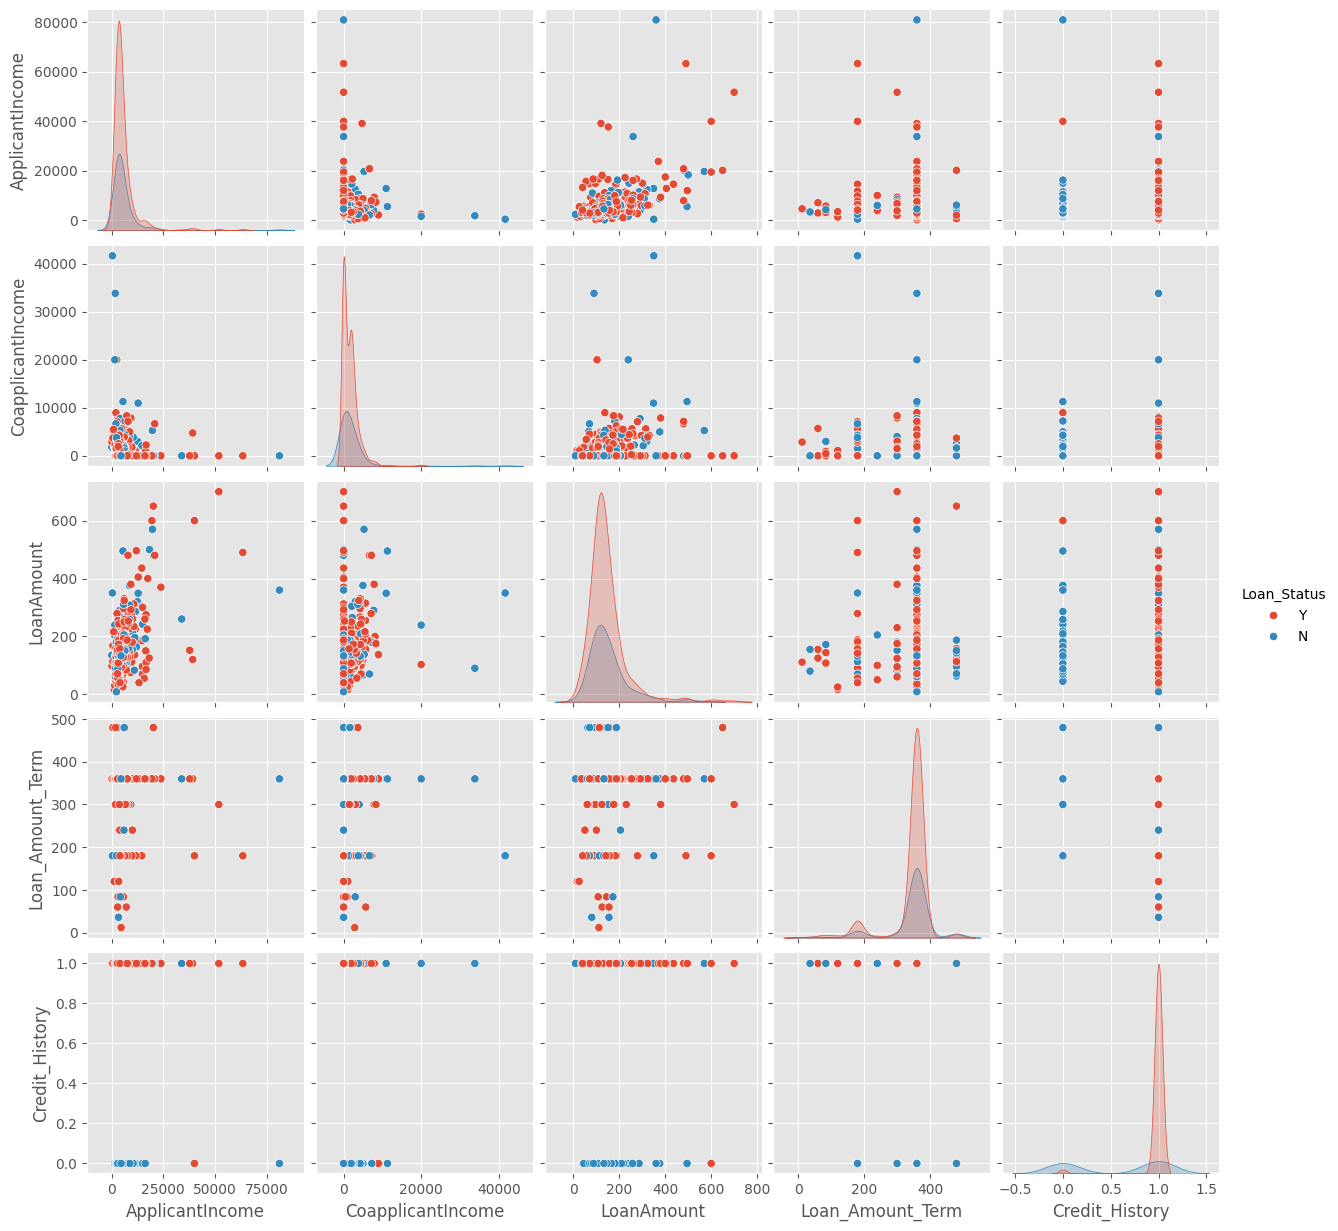

In [66]:
sns.pairplot(loan,hue='Loan_Status')

# Clustermap

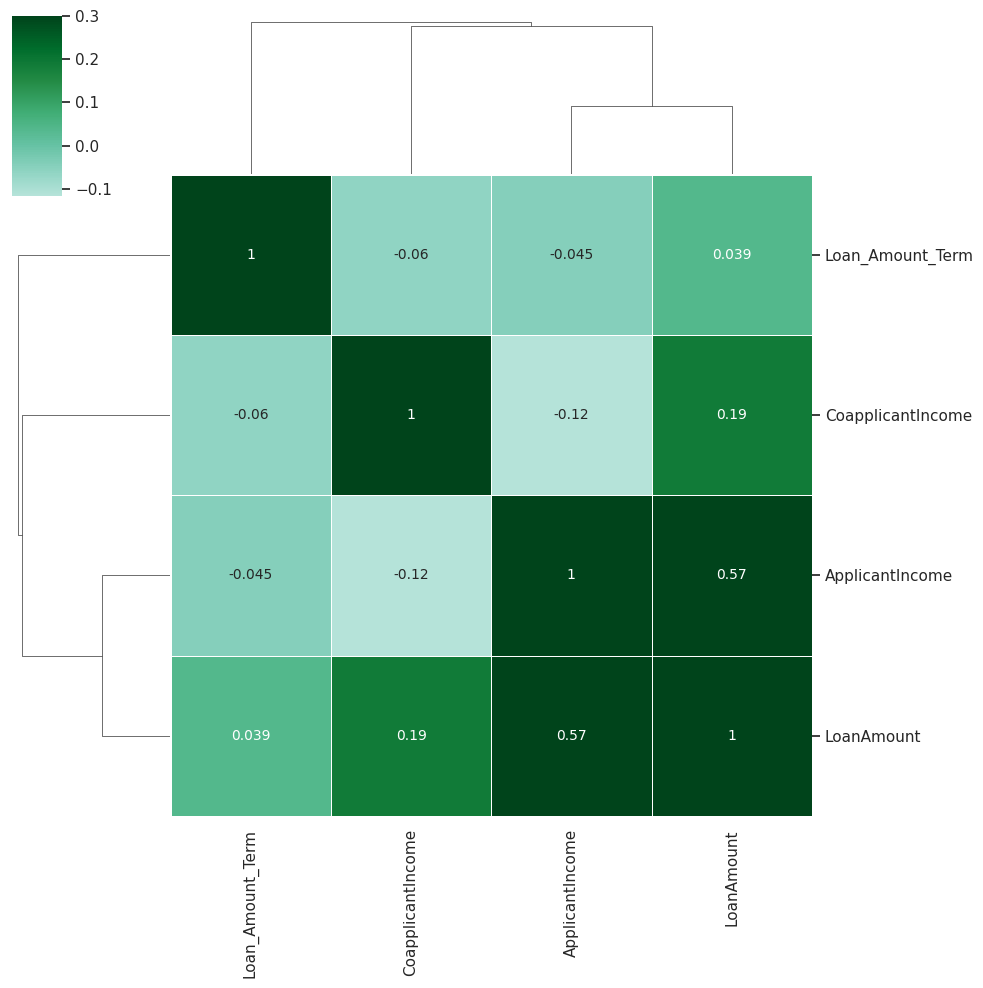

In [67]:
corr = num_data.corr()
sns.set(font_scale=1)
sns.clustermap(corr, cmap='BuGn', vmax=.3, center=0,square=False, linewidths=.5,annot=True, cbar_kws={"shrink": .5},annot_kws={"size": 10})

## Missing Value Treatment

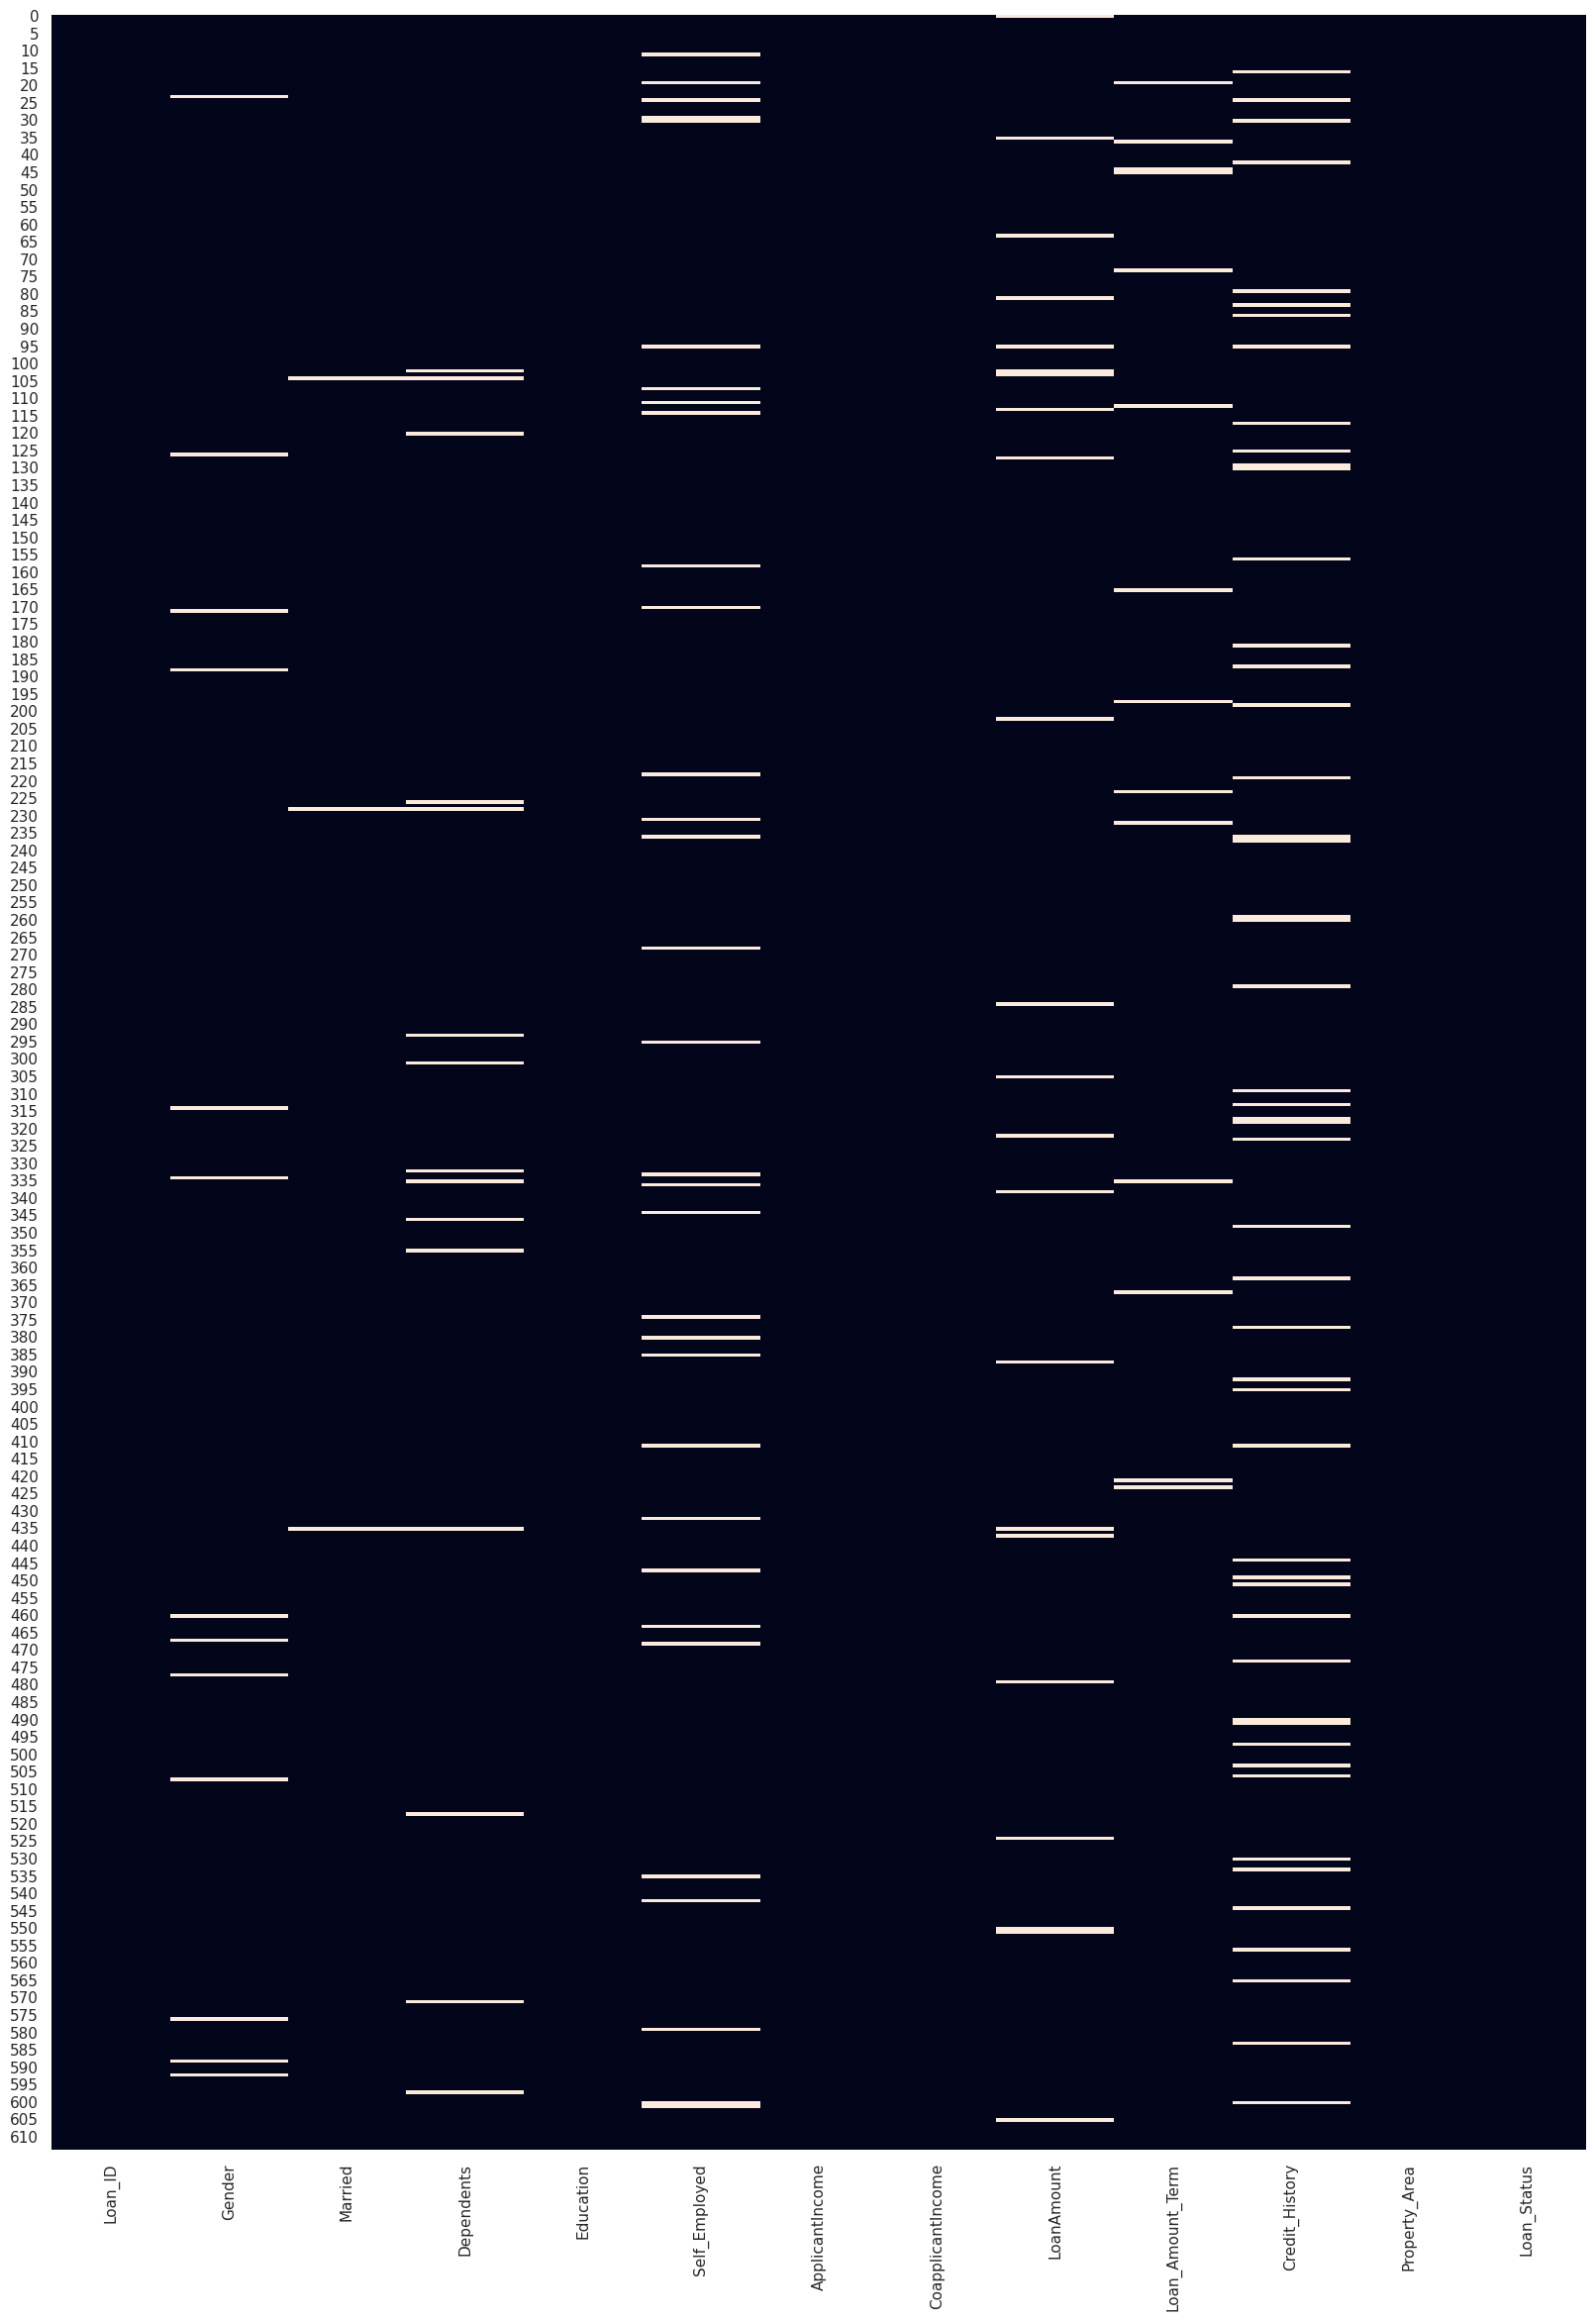

In [68]:
# visualize using Heat map
plt.figure(figsize=(20,28))
sns.heatmap(loan.isnull(), cbar=False);plt.show()

In [69]:
#Checking the null Values in Data
loan.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
#Function to calculate missing values by column function
def miss_value_table(df):
    miss_value=df.isnull().sum()
    percent_miss_value=(miss_value/len(df))*100
    miss_value_table=pd.concat([miss_value, percent_miss_value],axis=1)
    miss_value_table_columns=miss_value_table.rename({0:'Missing Values',1 : '% of Total Values'},axis=1)
    miss_value_table_columns=miss_value_table_columns[miss_value_table_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(2)
    return miss_value_table_columns
missing_values=miss_value_table(loan)
missing_values

,Missing Values,% of Total Values
Credit_History,50,8.14
Self_Employed,32,5.21
LoanAmount,22,3.58
Dependents,15,2.44
Loan_Amount_Term,14,2.28
Gender,13,2.12
Married,3,0.49


In [71]:
len(loan)

614

**Inference:** <br />
When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation).

In [72]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y


In [73]:
#missing value imputation for categorical variable using mode
cat_data.fillna(cat_data.mode().iloc[0], inplace=True)
cat_data.isnull().sum().any() # no more missing data

False

In [74]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [75]:
#missing value imputation for numeric variable using backfill (use next valid observation to fill gap)
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() #no more missing data

False

## Variable Creation

In [76]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome on train data
num_data['TotalIncome'] = num_data['ApplicantIncome'] + num_data['CoapplicantIncome']

In [77]:
num_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [78]:
num_data.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,128.0,360.0,5849.0
1,128.0,360.0,6091.0
2,66.0,360.0,3000.0
3,120.0,360.0,4941.0
4,141.0,360.0,6000.0


In [79]:
# Transform the Target column
target_values = {'Y':1,'N':0}
target = cat_data['Loan_Status']
y = target.map(target_values)

In [80]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [81]:
cat_data.drop(columns={'Loan_Status','Loan_ID'}, axis=1, inplace=True)

In [82]:
cat_data['Gender'].replace({'Male':1,'Female':0},inplace=True)
cat_data['Married'].replace({'Yes':1,'No':0},inplace=True)
cat_data['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
cat_data['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [83]:
cat_data['Credit_History'] = cat_data['Credit_History'].astype('int64')

In [84]:
cat_data['Credit_History'] = cat_data['Credit_History'].astype('float64')

In [85]:
# transform other columns
cat_data = pd.get_dummies(cat_data)
cat_data.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,1.0,1,0,0,0,0,0,1
1,1,1,1,0,1.0,0,1,0,0,1,0,0
2,1,1,1,1,1.0,1,0,0,0,0,0,1
3,1,1,0,0,1.0,1,0,0,0,0,0,1
4,1,0,1,0,1.0,1,0,0,0,0,0,1


## Variable Transformation(outliers treatment)

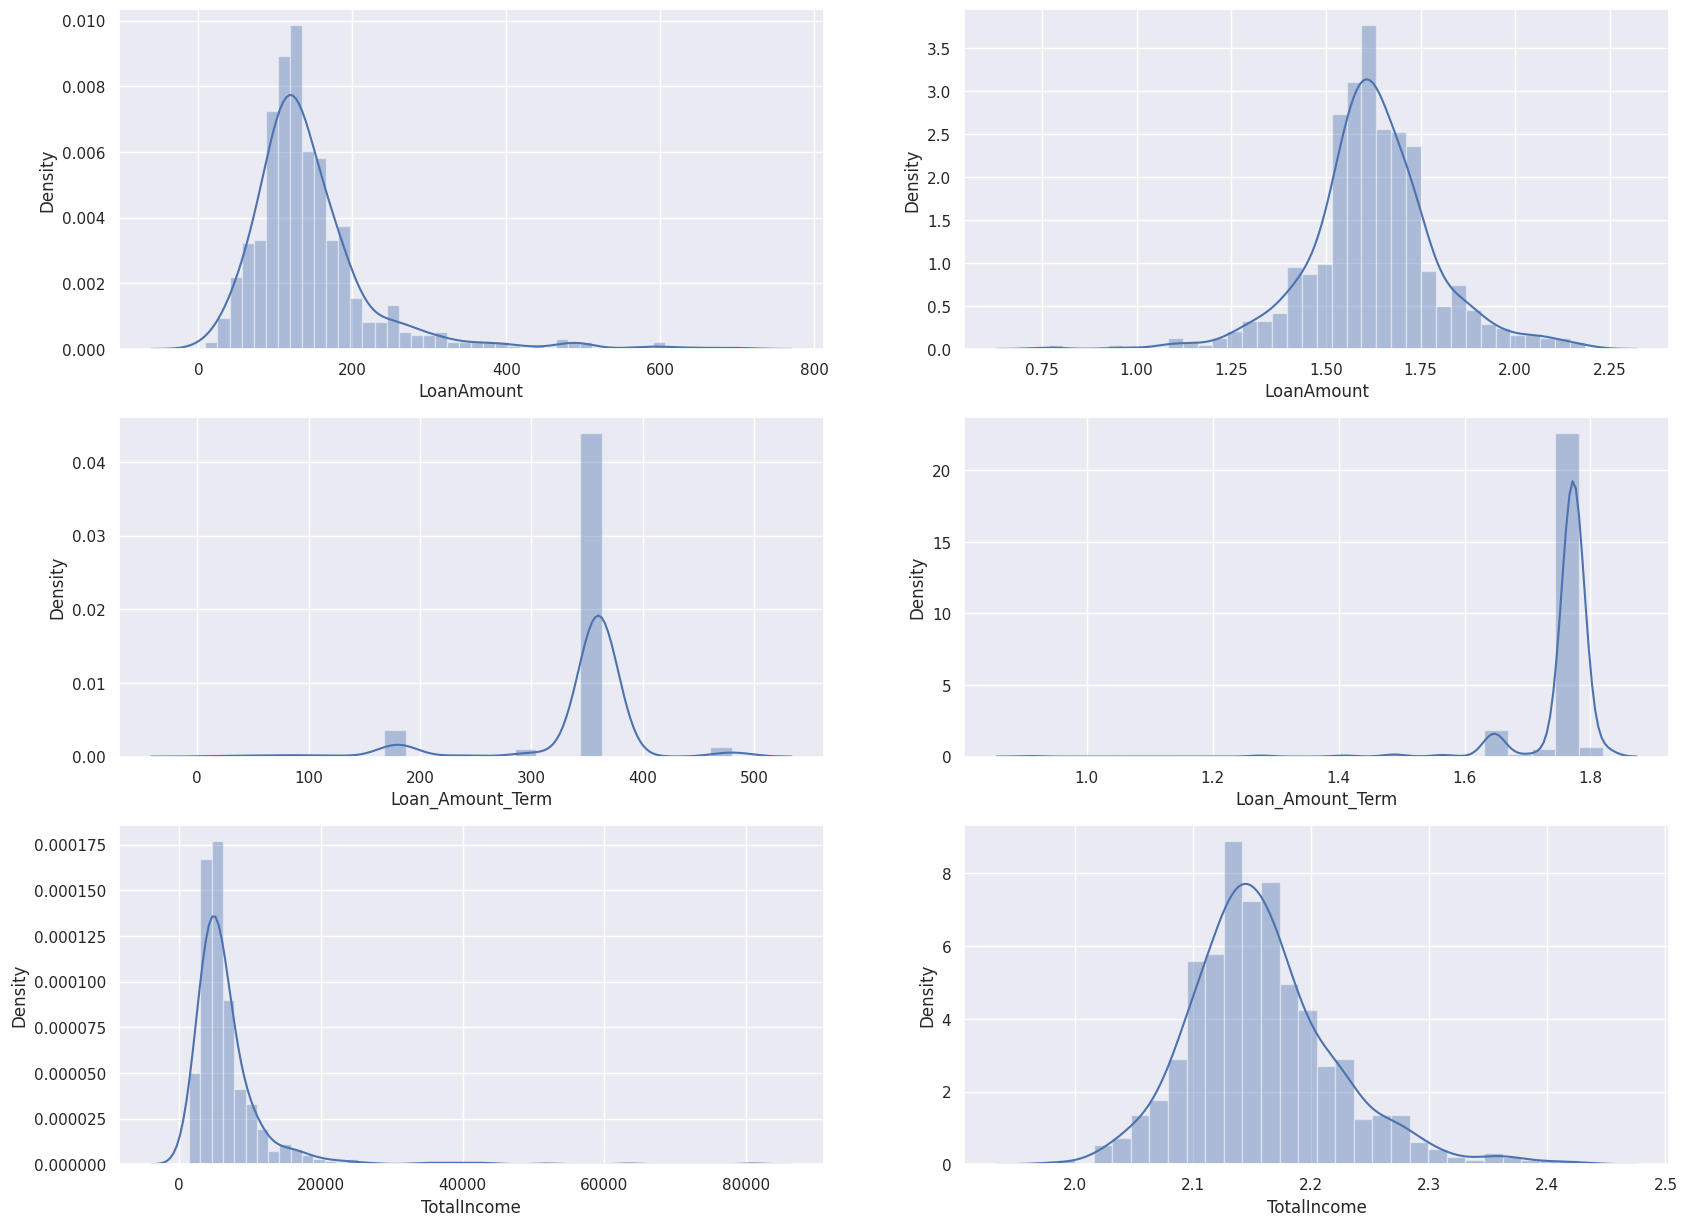

In [86]:
plt.figure(figsize=(20,15))
plt.subplot(321);sns.distplot(num_data['LoanAmount']);      plt.subplot(322);sns.distplot(np.log(np.cbrt(num_data["LoanAmount"]+1)))
plt.subplot(323);sns.distplot(num_data['Loan_Amount_Term']);plt.subplot(324);sns.distplot(np.log(np.log(num_data['Loan_Amount_Term'])))
plt.subplot(325);sns.distplot(num_data['TotalIncome']);     plt.subplot(326);sns.distplot(np.log(np.log(num_data["TotalIncome"]+1)));plt.show()

In [87]:
# Apply this transformations on numeric columns
num_data_trans = pd.DataFrame()
num_data_trans['LoanAmount'] =np.log(np.cbrt(num_data["LoanAmount"]+1))
num_data_trans['Loan_Amount_Term']=np.log(np.log(num_data['Loan_Amount_Term']))
num_data_trans['TotalIncome'] =np.log(np.log(num_data["TotalIncome"]+1))

In [88]:
num_data_trans.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,1.619937,1.772594,2.160353
1,1.619937,1.772594,2.165015
2,1.401564,1.772594,2.080279
3,1.598597,1.772594,2.140716
4,1.651942,1.772594,2.163286


### Normalizaiton of data

In [89]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()


In [90]:
num_scale = pd.DataFrame(scale.fit_transform(num_data_trans),columns=num_data_trans.columns)

In [91]:
num_scale.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,0.601711,0.947567,0.399387
1,0.601711,0.947567,0.409968
2,0.447563,0.947567,0.217659
3,0.586647,0.947567,0.354821
4,0.624304,0.947567,0.406045


In [92]:
final_loan = pd.concat([cat_data, num_scale, y], axis=1)

In [93]:
final_loan.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Status
0,1,0,1,0,1.0,1,0,0,0,0,0,1,0.601711,0.947567,0.399387,1
1,1,1,1,0,1.0,0,1,0,0,1,0,0,0.601711,0.947567,0.409968,0
2,1,1,1,1,1.0,1,0,0,0,0,0,1,0.447563,0.947567,0.217659,1
3,1,1,0,0,1.0,1,0,0,0,0,0,1,0.586647,0.947567,0.354821,1
4,1,0,1,0,1.0,1,0,0,0,0,0,1,0.624304,0.947567,0.406045,1


In [94]:
final_loan.shape

(614, 16)

In [95]:
# spliting data
X = final_loan.iloc[:,:-1]
Y = final_loan.iloc[:,-1]

In [96]:
X.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,TotalIncome
0,1,0,1,0,1.0,1,0,0,0,0,0,1,0.601711,0.947567,0.399387
1,1,1,1,0,1.0,0,1,0,0,1,0,0,0.601711,0.947567,0.409968
2,1,1,1,1,1.0,1,0,0,0,0,0,1,0.447563,0.947567,0.217659
3,1,1,0,0,1.0,1,0,0,0,0,0,1,0.586647,0.947567,0.354821
4,1,0,1,0,1.0,1,0,0,0,0,0,1,0.624304,0.947567,0.406045


In [97]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## Balancing the data

In [98]:
from collections import Counter
from imblearn.combine import SMOTETomek

for more [information](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

In [99]:
print('Original data set shape %s' % Counter(Y))
imb = SMOTETomek(sampling_strategy='minority',random_state=1)
X_res,Y_res = imb.fit_resample(X,Y)
print('Resample data set shape %s' % Counter(Y_res))

Original data set shape Counter({1: 422, 0: 192})
Resample data set shape Counter({1: 383, 0: 383})


1    383
0    383
Name: Loan_Status, dtype: int64


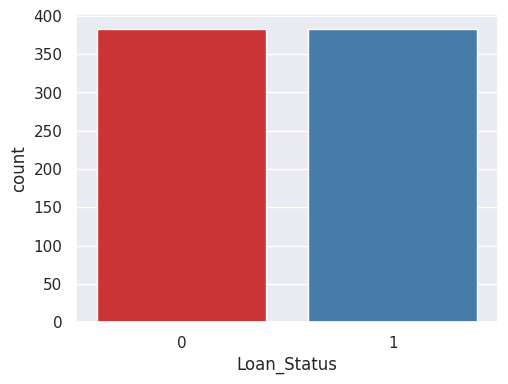

In [100]:
plt.figure(figsize=(12,4));plt.subplot(122);sns.countplot(x=Y_res, palette='Set1')#check our data is balanced or not
print(Y_res.value_counts())

# Model Building

In [101]:
# import nesessary thongs of model building and model evolution
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold, cross_val_score, cross_validate,GridSearchCV

#### Spliting Data

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.18,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((628, 15), (138, 15), (628,), (138,))

## Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
# Using Grid Search CV for Tunning Parameters
clf = LogisticRegression()
param_grid = [{'max_iter':[5,10,20,30,50,],'C':[0.01,0.1,0.2,0.3,0.4,0.6] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 0.2, 'max_iter': 20}, 0.7387864823348694)

In [105]:
model_LR=LogisticRegression(C=0.01,max_iter=5)
model_LR.fit(X_train, y_train)
model_LR.score(X_test,y_test)

0.7391304347826086

In [106]:
from sklearn.metrics import confusion_matrix
y_pred=model_LR.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[30 33]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.91      0.48      0.62        63
           1       0.69      0.96      0.80        75

    accuracy                           0.74       138
   macro avg       0.80      0.72      0.71       138
weighted avg       0.79      0.74      0.72       138



In [107]:
# Model Validation
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

In [108]:
kfold = KFold(shuffle=True, n_splits=6,random_state=7)
results = cross_validate(estimator=model_LR,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.004940
score_time         0.007909
test_accuracy      0.731012
train_accuracy     0.742297
test_precision     0.686037
train_precision    0.687072
test_recall        0.873075
train_recall       0.890737
test_f1_score      0.762808
train_f1_score     0.775129
dtype: float64

###  Feature Engineering(RFE) For LR
#### > RFE stands for Recursive Feature Elimination. It's a feature selection technique used to identify the most important features in a dataset for building machine learning models.

In [109]:
from sklearn.feature_selection import RFE
model_rfe=LogisticRegression(max_iter=5)   # max_iter=100 by default
rfe=RFE(model_rfe)  #n_features_to_select=4
fit=rfe.fit(X,Y)
print(fit.support_)
print(fit.ranking_)

[False  True False False  True False  True False False  True False  True
  True  True False]
[8 1 2 9 1 3 1 7 4 1 5 1 1 1 6]


In [110]:
X_res.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'LoanAmount', 'Loan_Amount_Term', 'TotalIncome'],
      dtype='object')

In [111]:
X_RFE = X_res.drop(columns={'Gender','Self_Employed','Dependents_2'},axis=1)
X_RFE

,Married,Education,Credit_History,Dependents_0,Dependents_1,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,TotalIncome
0,0,1,1.0,1,0,0,0,0,1,0.601711,0.947567,0.399387
1,1,1,1.0,0,1,0,1,0,0,0.601711,0.947567,0.409968
2,1,1,1.0,1,0,0,0,0,1,0.447563,0.947567,0.217659
3,1,0,1.0,1,0,0,0,0,1,0.586647,0.947567,0.354821
4,0,1,1.0,1,0,0,0,0,1,0.624304,0.947567,0.406045
...,...,...,...,...,...,...,...,...,...,...,...,...
761,1,1,1.0,1,0,0,1,0,0,0.922169,0.947567,0.732464
762,1,0,0.0,0,0,0,0,0,1,0.751660,0.942808,0.493516
763,0,1,1.0,1,0,0,0,0,1,0.474820,0.947567,0.215678
764,0,1,0.0,1,0,0,0,0,1,0.533697,0.947567,0.300781


In [112]:
#Using Grid Search CV for Tunning Parameters
X_train,X_test,y_train,y_test=train_test_split(X_RFE,Y_res,test_size=0.20,random_state=20)
clf = LogisticRegression()  #
clf.get_params().keys()
param_grid = [{'max_iter':[5,10,20,30,50],'C':[0.2,0.3,0.4,0.6,1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 0.6, 'max_iter': 20}, 0.7451612903225808)

In [113]:
model_LR=LogisticRegression(C=1,max_iter=20)
model_LR.fit(X_train, y_train)
model_LR.score(X_test,y_test)

0.7012987012987013

In [114]:
from sklearn.metrics import confusion_matrix
y_pred=model_LR.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[37 25]
 [21 71]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        62
           1       0.74      0.77      0.76        92

    accuracy                           0.70       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.70      0.70      0.70       154



## Decision Tree

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=10)

In [116]:
#using Model of Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [117]:
model_ent = DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_split=3,min_samples_leaf=2,ccp_alpha=0.001,
                                    max_depth=7,random_state=9)
model_ent.fit(X_train, y_train)
model_ent.score(X_test,y_test)

0.7142857142857143

In [118]:
from sklearn.metrics import confusion_matrix
y_pred=model_ent.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[45 28]
 [16 65]]
              precision    recall  f1-score   support

           0       0.74      0.62      0.67        73
           1       0.70      0.80      0.75        81

    accuracy                           0.71       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.72      0.71      0.71       154



In [119]:
kfold = KFold(shuffle=True, n_splits=6,random_state=7)
results = cross_validate(estimator=model_ent,X=X_res,y=Y_res, cv=kfold, scoring=scoring, return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.002856
score_time         0.005776
test_accuracy      0.740198
train_accuracy     0.792691
test_precision     0.712907
train_precision    0.769238
test_recall        0.800569
train_recall       0.840550
test_f1_score      0.751269
train_f1_score     0.801950
dtype: float64

In [120]:
# Decision Tree using GINI criterion
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=13,random_state=30)
model_gini.fit(X_train, y_train)
model_gini.score(X_test,y_test)

0.7532467532467533

In [121]:
from sklearn.metrics import confusion_matrix
y_pred=model_gini.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[49 24]
 [14 67]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        73
           1       0.74      0.83      0.78        81

    accuracy                           0.75       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.76      0.75      0.75       154



In [122]:
kfold = KFold(shuffle=True, n_splits=7,random_state=7)
results = cross_validate(estimator=model_gini,X=X_res,y=Y_res, cv=kfold, scoring=scoring, return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.004013
score_time         0.005012
test_accuracy      0.770166
train_accuracy     0.964751
test_precision     0.786208
train_precision    0.962116
test_recall        0.756268
train_recall       0.968165
test_f1_score      0.764062
train_f1_score     0.964931
dtype: float64

## KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
# Using PPScore we drop some variable which has less participation in model building
X_knn=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+',
                  'Property_Area_Urban',"Gender",'Married',"Dependents_2"],axis=1)

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X_knn,Y_res,test_size=0.20,random_state=20)

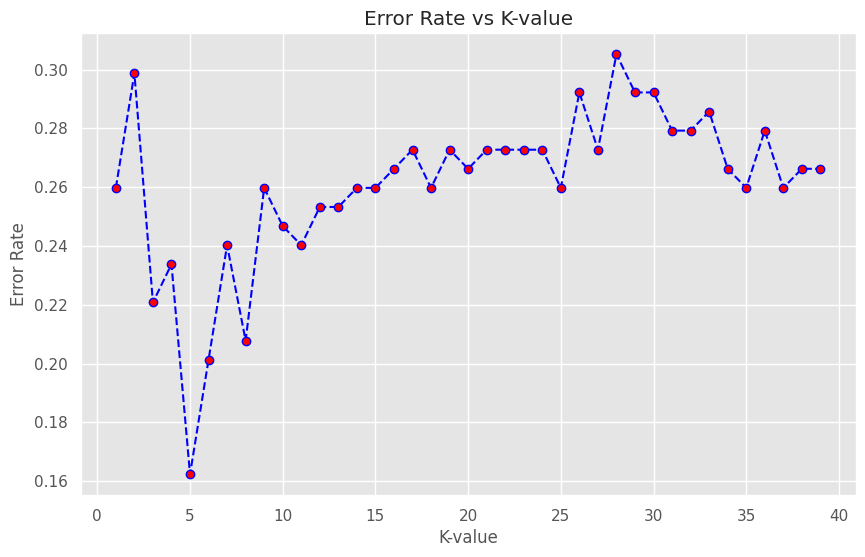

In [126]:
# TO predict k value
err_rates = []
for idx in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, y_train)
    pred_idx = knn.predict(X_test)
    err_rates.append(np.mean(y_test != pred_idx))
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,40), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value');plt.show()

In [127]:
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
model_KNN.score(X_test,y_test)

0.8376623376623377

In [128]:
from sklearn.metrics import confusion_matrix
y_pred=model_KNN.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[53  9]
 [16 76]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        62
           1       0.89      0.83      0.86        92

    accuracy                           0.84       154
   macro avg       0.83      0.84      0.83       154
weighted avg       0.84      0.84      0.84       154



In [129]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(shuffle=True,n_splits=11, random_state=1)
results = cross_validate(estimator=model_KNN,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.002885
score_time         0.009412
test_accuracy      0.792434
train_accuracy     0.869713
test_precision     0.785049
train_precision    0.859264
test_recall        0.817189
train_recall       0.884336
test_f1_score      0.798544
train_f1_score     0.871594
dtype: float64

## SVM

In [130]:
from sklearn.svm import SVC

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=30)

In [132]:
#Grid Search CV for tunning hyper parameters
clf = SVC()
param_grid = [{'kernel':['rbf','poly','sigmoid'],'gamma':[15,5,0.5,0.005,0.0005,0.00005],'C':[0.2,1,0.5,0.1,0.001,0.2] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)
print(gsv.best_params_)
print(gsv.best_score_ )

{'C': 1, 'gamma': 15, 'kernel': 'poly'}
0.8139079851930194


In [133]:
model_SVC=SVC(C=0.2,kernel='poly',gamma=15)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_test,y_test)

0.7727272727272727

In [134]:
from sklearn.metrics import confusion_matrix
y_pred=model_SVC.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[56 20]
 [15 63]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        76
           1       0.76      0.81      0.78        78

    accuracy                           0.77       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.77      0.77      0.77       154



In [135]:
kfold = KFold(shuffle=True, n_splits=9,random_state=30)
results = cross_validate(estimator=model_SVC,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.705543
score_time         0.005756
test_accuracy      0.789907
train_accuracy     0.946313
test_precision     0.785915
train_precision    0.937082
test_recall        0.797646
train_recall       0.956879
test_f1_score      0.791312
train_f1_score     0.946831
dtype: float64

## Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,random_state=55,test_size=0.2)

In [138]:
model_RF=RandomForestClassifier(n_estimators=120,criterion='entropy',random_state=50,max_depth=7)
model_RF.fit(X_train, y_train)
model_RF.score(X_test,y_test)

0.8116883116883117

In [139]:
from sklearn.metrics import confusion_matrix
y_pred=model_RF.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[48 24]
 [ 5 77]]
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        72
           1       0.76      0.94      0.84        82

    accuracy                           0.81       154
   macro avg       0.83      0.80      0.80       154
weighted avg       0.83      0.81      0.81       154



In [140]:
kfold = KFold(shuffle=True, n_splits=9,random_state=30)
results = cross_validate(estimator=model_RF,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.145435
score_time         0.010403
test_accuracy      0.802918
train_accuracy     0.879081
test_precision     0.744778
train_precision    0.814007
test_recall        0.928077
train_recall       0.983003
test_f1_score      0.825610
train_f1_score     0.890521
dtype: float64

## Ensemble Models

we finalized KNN, SVM, Extra Tree Classifier, Random forest

In [141]:
#create the ensemble model
from sklearn.ensemble import VotingClassifier     #Heterogenious

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=80)

In [143]:
#create the submodels
estimators=[]
estimators.append(('KNN', model_KNN))
estimators.append(('SVM',model_SVC))
estimators.append(('DT',model_gini))
estimators.append(('RF',model_RF))

In [144]:
combine_model=VotingClassifier(estimators)
combine_model.fit(X_train, y_train)
combine_model.score(X_test,y_test)

0.8246753246753247

In [145]:
from sklearn.metrics import confusion_matrix
y_pred=combine_model.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

[[60 14]
 [13 67]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        74
           1       0.83      0.84      0.83        80

    accuracy                           0.82       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.82      0.82      0.82       154



In [146]:
kfold = KFold(shuffle=True, n_splits=9,random_state=30)
results = cross_validate(estimator=combine_model,X=X_res,y=Y_res, cv=kfold, scoring=scoring,return_train_score=True)
pd.DataFrame(results).mean()

fit_time           0.878220
score_time         0.018680
test_accuracy      0.817313
train_accuracy     0.953493
test_precision     0.817877
train_precision    0.947007
test_recall        0.821636
train_recall       0.960769
test_f1_score      0.818665
train_f1_score     0.953779
dtype: float64

In [147]:
import pickle

In [148]:
pickle_out=open("classifier.pkl","wb")
pickle.dump(combine_model,pickle_out)
pickle_out.close()

# Work on test Data

In [149]:
########## look the data ##########
loan_test = pd.read_csv('test.csv')
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [150]:
####### check no. of rows and columns #######
loan_test.shape

(367, 12)

In [151]:
loan_test.info()  # check data types, null values, count etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [152]:
loan_test.nunique().sort_values(ascending=False) # check unique values

Loan_ID              367
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Dependents             4
Property_Area          3
Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
dtype: int64

In [153]:
# change the data type of Credit_History column
loan_test['Credit_History'] = loan_test['Credit_History'].astype('O')

In [154]:
loan_test.dtypes.value_counts()

object     8
int64      2
float64    2
dtype: int64

In [155]:
# describe the chategoric columns
loan_test.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
count,367,356,367,357,367,344,338.0,367
unique,367,2,2,4,2,2,2.0,3
top,LP001015,Male,Yes,0,Graduate,No,1.0,Urban
freq,1,286,233,200,283,307,279.0,140


In [156]:
# First we split numeric and chategoric columns seperately
cat_data_t = []
num_data_t = []
for col,types in enumerate(loan_test.dtypes):
    if types=='object':
        cat_data_t.append(loan_test.iloc[:,col])
    else:
        num_data_t.append(loan_test.iloc[:,col])

cat_data_t = pd.DataFrame(cat_data_t).T
num_data_t= pd.DataFrame(num_data_t).T

In [157]:
cat_data_t.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban


In [158]:
num_data_t.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720.0,0.0,110.0,360.0
1,3076.0,1500.0,126.0,360.0


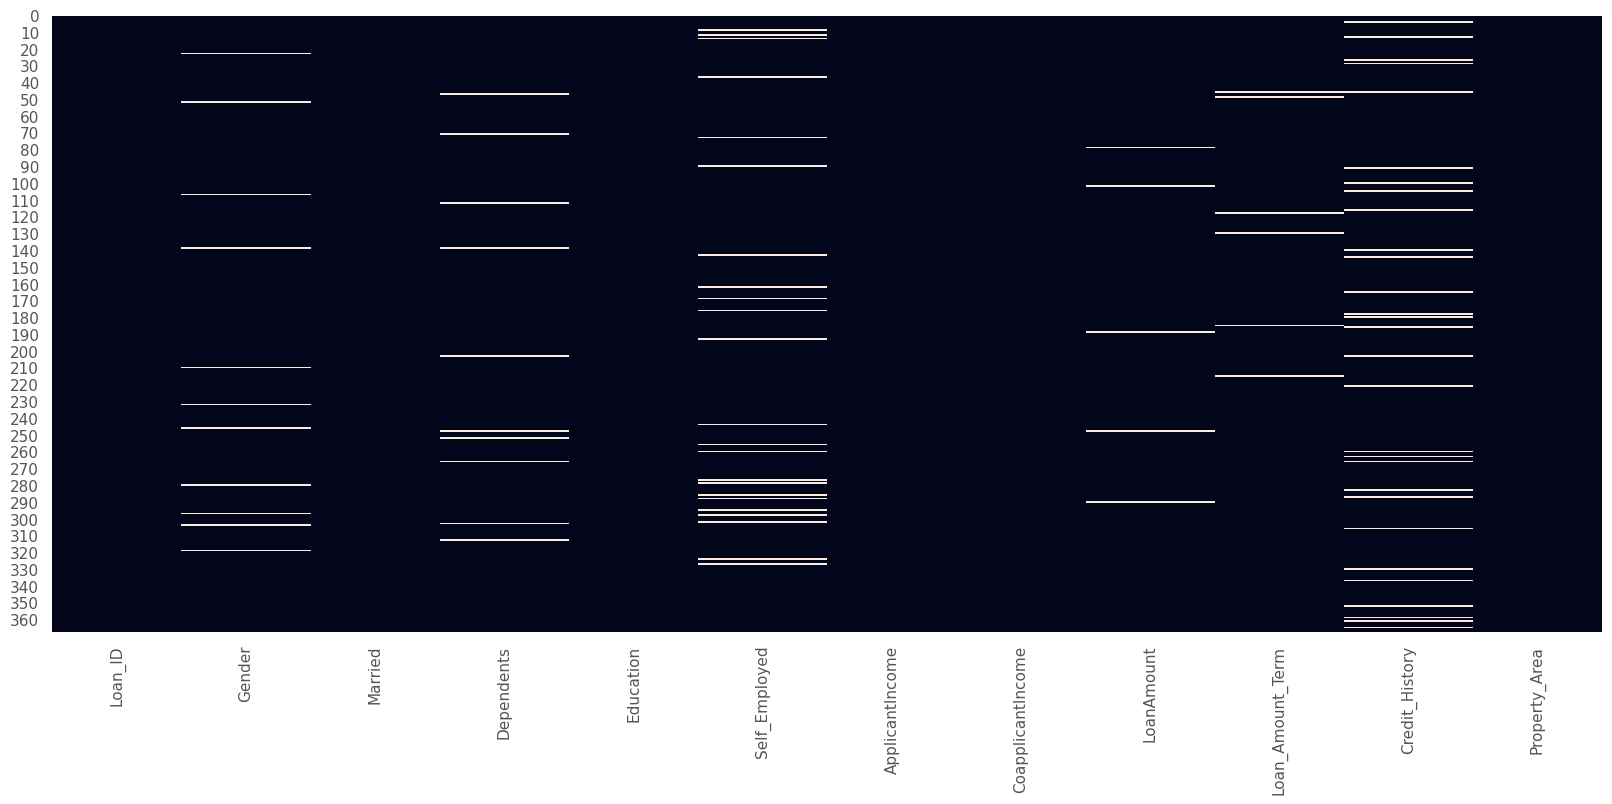

In [159]:
# visualize using Heat map
plt.figure(figsize=(20,8))
sns.heatmap(loan_test.isnull(), cbar=False);plt.show()

In [160]:
#Checking the null Values in Data
loan_test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [161]:
cat_data_t.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban


In [162]:
#missing value imputation for categorical variable using mode
cat_data_t.fillna(cat_data_t.mode().iloc[0], inplace=True)
cat_data_t.isnull().sum().any() # no more missing data

False

In [163]:
num_data_t.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720.0,0.0,110.0,360.0
1,3076.0,1500.0,126.0,360.0
2,5000.0,1800.0,208.0,360.0
3,2340.0,2546.0,100.0,360.0
4,3276.0,0.0,78.0,360.0


In [164]:
#missing value imputation for numeric variable using backfill (use next valid observation to fill gap)
num_data_t.fillna(method='bfill', inplace=True)
num_data_t.isnull().sum().any() #no more missing data

False

In [165]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome on train data
num_data_t['TotalIncome'] = num_data_t['ApplicantIncome'] + num_data_t['CoapplicantIncome']

In [166]:
num_data_t.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [167]:
num_data_t.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,110.0,360.0,5720.0
1,126.0,360.0,4576.0
2,208.0,360.0,6800.0
3,100.0,360.0,4886.0
4,78.0,360.0,3276.0


In [168]:
cat_data_t.drop(columns={'Loan_ID'}, axis=1, inplace=True)

In [169]:
cat_data_t['Gender'].replace({'Male':1,'Female':0},inplace=True)
cat_data_t['Married'].replace({'Yes':1,'No':0},inplace=True)
cat_data_t['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
cat_data_t['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [170]:
cat_data_t['Credit_History'] = cat_data_t['Credit_History'].astype('int64')

In [171]:
# transform other columns
cat_data_t = pd.get_dummies(cat_data_t)
cat_data_t.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,1,0,1,1,0,0,0,0,0,1
1,1,1,1,0,1,0,1,0,0,0,0,1
2,1,1,1,0,1,0,0,1,0,0,0,1
3,1,1,1,0,1,0,0,1,0,0,0,1
4,1,0,0,0,1,1,0,0,0,0,0,1


In [172]:
num_data_trans_t = pd.DataFrame()
num_data_trans_t['LoanAmount'] =np.log(np.cbrt(num_data_t["LoanAmount"]+1))
num_data_trans_t['Loan_Amount_Term']=np.log(np.log(num_data_t['Loan_Amount_Term']))
num_data_trans_t['TotalIncome'] =np.log(np.log(num_data_t["TotalIncome"]+1))

num_data_trans_t.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,1.569843,1.772594,2.157779
1,1.614729,1.772594,2.131654
2,1.780778,1.772594,2.177569
3,1.538374,1.772594,2.139399
4,1.456483,1.772594,2.091208


In [173]:
### Normalizaiton of data using MinMaxScaler()
num_scale_t = pd.DataFrame(scale.fit_transform(num_data_trans_t),columns=num_data_trans_t.columns)
num_scale_t.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,0.455854,0.961428,0.362552
1,0.501587,0.961428,0.297855
2,0.670769,0.961428,0.411562
3,0.423790,0.961428,0.317036
4,0.340354,0.961428,0.197688


In [174]:
final_loan_test = pd.concat([cat_data_t, num_scale_t], axis=1)
final_loan_test.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,TotalIncome
0,1,1,1,0,1,1,0,0,0,0,0,1,0.455854,0.961428,0.362552
1,1,1,1,0,1,0,1,0,0,0,0,1,0.501587,0.961428,0.297855
2,1,1,1,0,1,0,0,1,0,0,0,1,0.670769,0.961428,0.411562
3,1,1,1,0,1,0,0,1,0,0,0,1,0.423790,0.961428,0.317036
4,1,0,0,0,1,1,0,0,0,0,0,1,0.340354,0.961428,0.197688


In [175]:
final_loan_test.shape

(367, 15)

In [176]:
combine_model.fit(X_res, Y_res)
predicted_values=combine_model.predict(final_loan_test)

In [177]:
predicted_loan_status=pd.DataFrame(predicted_values,columns=['Predicted_Loan_status'])

In [178]:
final_prediction = pd.concat([loan_test['Loan_ID'],predicted_loan_status],axis=1)
final_prediction

,Loan_ID,Predicted_Loan_status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,0
363,LP002975,0
364,LP002980,1
365,LP002986,0


# Conclusion:
__We did Exploratory data Analysis on the features of this dataset and saw how each feature is distributed.__<br/>

__We did Univariate Analysis and bivariate analysis to see imapct of one another on their features using charts.__<br/>

__We analysed each variable to check if data is cleaned and normally distributed.__<br/>

__We cleaned the data and filled NA values with mode and bfill__<br/>

__We calculated correaltion between independent variables and found that applicant income and loan amount have significant relation.__<br/>

__We created dummy variables for constructing the model__<br/>

__We constructed models taking different variables into account and credit history is creating the most impact on loan giving decision__<br/>

__We treat outliers as variable transformation and normalized it__<br/>

__For data balanced we used SMOTETomek__<br/>

__Finally, from model building using Encemble Model we finalized KNN, SVM, Decision Tree, Random Forest and we got training accuracy of 85.06% with validation score 81.85%__

__*Thank you...*__